# D212 task 2

## Import packages and data

In [40]:
# import pandas for dataframe manipulation and other utilities
import pandas as pd

# import numpy for array-wise operations and other math utilities
import numpy as np

# import pyplot as foundational visualization library
import matplotlib.pyplot as plt

# import PCA for principal component analysis
from sklearn.decomposition import PCA

# import seaborn for additional visualization functions
import seaborn as sns

# filter out warnings to clean up output
import warnings
warnings.filterwarnings('ignore')

# import data
df = pd.read_csv('data/medical_clean.csv')

# import manually created data definitons as lookup table for differentiating qualitative/quantitative columns for processing
df_var_definitions = pd.read_csv('data/var_definitions.csv', encoding = 'unicode_escape', engine ='python')

## Remove duplicates & check for nulls

In [41]:
# check for null/nan values
# and print results
# from source: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
print(f'Total rows in whole dataset: {df.shape[0]}')
print(f'{"="*80}')
print(f'number of nulls found: {df.isnull().sum().sum()}')

# check that there are 10,000 rows if you run drop na
df = df.dropna()
print(f'number of rows after dropping rows with na values: {df.shape[0]}')
print(f'change detected after duplicates dropped?: {df.drop_duplicates().shape[0] != df.shape[0]}')

# check for duplicates
print(f'number of rows with duplicate values: {df.duplicated().sum()}')

Total rows in whole dataset: 10000
number of nulls found: 0
number of rows after dropping rows with na values: 10000
change detected after duplicates dropped?: False
number of rows with duplicate values: 0


## Copy dataframe to keep original in tact

In [42]:
# check number of observations and features of dataframe
df.shape

(10000, 50)

In [43]:
# inspect dataframe features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [44]:
# create copy of dataframe for further manipulation
df_init = df.copy(deep=True)



## Standardize column names

* src = https://saturncloud.io/blog/how-to-create-a-dictionary-of-two-pandas-dataframe-columns/

In [45]:
# strip any whitespace to avoid frustrating naming mismatches
df_init = df_init.rename(columns=lambda x: x.strip())

# fetch column mapping from var definition file
new_col_df = df_var_definitions.copy(deep=True)

var_dict = new_col_df.set_index('Variable Name')['Standardized Name'].to_dict()

# rename columns using the mapping defined above
df_init.rename(columns = var_dict, inplace=True)

# print columns
df_init.columns.tolist()

['case_order',
 'customer_id',
 'interaction',
 'uid',
 'city',
 'state',
 'county',
 'zip',
 'lat',
 'lng',
 'population',
 'area',
 'tiemzone',
 'job',
 'children',
 'age',
 'income',
 'martial',
 'gender',
 'readmitted_in_30_days',
 'vit_d_levels',
 'doc_visits',
 'full_meals_eaten',
 'vit_d_supp',
 'soft_drink',
 'initial_admin',
 'high_blood',
 'stroke',
 'complication_risk',
 'overweight',
 'arthritis',
 'diabetes',
 'hyperlipidemia',
 'back_pain',
 'anxiety',
 'allergic_rhinitis',
 'reflux_esophagitis',
 'asthma',
 'services',
 'initial_days',
 'total_charge',
 'additional_charges',
 'survey_timely_admission',
 'survey_timely_treatment',
 'survey_timely_visits',
 'survey_reliability',
 'survey_options',
 'survey_hours_of_treatment',
 'survey_courteous_staff',
 'survey_doctor_active_listens']

In [46]:


# verify that our data variable type dictionary values are distinct and only contain two values: Qualitative and Quantitative
set(df_var_definitions['Data Type (Quantitative/Qualitative)'])

# create two lists of columns: one of all qualitative columns and one of all quantitative columns
qualitative_columns = []
quantitative_columns = []
unmapped_columns = []

map_count = 0

# test and add columns to appropriate list based on stripped column name from var list
for column in df_init.columns:
    curr_type = df_var_definitions.loc[df_var_definitions['Standardized Name'].str.strip() == column,'Data Type (Quantitative/Qualitative)']

    try:
        if curr_type.size > 0:
            if curr_type.values[0] == 'Qualitative':
                qualitative_columns.append(column)
                
            elif curr_type.values[0] == 'Quantitative':
                quantitative_columns.append(column)
                
        else:
            unmapped_columns.append(column)
            
    except:
        print('something went wrong')
        
# count mapped columns
map_count = len(qualitative_columns) + len(quantitative_columns)

# compare total column count vs. mapped and display warning if mismatched
print(f'{"--"*20}\n {map_count} of {len(df_init.columns)} columns mapped successfully \n{"--"*20}')

if len(unmapped_columns) > 0:
    print(f'WARNING: Unable to map some columns: {unmapped_columns} \n{"=="*20}')

----------------------------------------
 50 of 50 columns mapped successfully 
----------------------------------------


In [47]:
df_init.describe()

,case_order,zip,lat,lng,population,children,age,income,vit_d_levels,doc_visits,...,total_charge,additional_charges,survey_timely_admission,survey_timely_treatment,survey_timely_visits,survey_reliability,survey_options,survey_hours_of_treatment,survey_courteous_staff,survey_doctor_active_listens
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [48]:
df_init.describe(exclude='number')

,customer_id,interaction,uid,city,state,county,area,tiemzone,job,martial,...,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [49]:
# display type and number of quantitative colunns found
df_init[quantitative_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 10000 non-null  float64
 1   lng                 10000 non-null  float64
 2   population          10000 non-null  int64  
 3   children            10000 non-null  int64  
 4   age                 10000 non-null  int64  
 5   income              10000 non-null  float64
 6   vit_d_levels        10000 non-null  float64
 7   doc_visits          10000 non-null  int64  
 8   full_meals_eaten    10000 non-null  int64  
 9   vit_d_supp          10000 non-null  int64  
 10  initial_days        10000 non-null  float64
 11  total_charge        10000 non-null  float64
 12  additional_charges  10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [50]:
# display type and number of quantitative colunns found
df_init[qualitative_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   case_order                    10000 non-null  int64 
 1   customer_id                   10000 non-null  object
 2   interaction                   10000 non-null  object
 3   uid                           10000 non-null  object
 4   city                          10000 non-null  object
 5   state                         10000 non-null  object
 6   county                        10000 non-null  object
 7   zip                           10000 non-null  int64 
 8   area                          10000 non-null  object
 9   tiemzone                      10000 non-null  object
 10  job                           10000 non-null  object
 11  martial                       10000 non-null  object
 12  gender                        10000 non-null  object
 13  readmitted_in_30_

# Pairplot

* src = https://campus.datacamp.com/courses/dimensionality-reduction-in-python/exploring-high-dimensional-data?ex=4

In [51]:
# select all quantitative columns into a new dataframe
# pairplot_columns = quantitative_columns.copy()

# append readmission for coloration
# pairplot_columns.append('readmitted_in_30_days')

# perform pairplot to inspect data visually
# df_pairplot = df_init[pairplot_columns].copy(deep=True)

In [52]:
# reduce fatures before doing pairplot
# sns.pairplot(df_pairplot, hue="readmitted_in_30_days", diag_kind='hist')

## Correlation Matrix 

* src = https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information?ex=9

<Axes: >

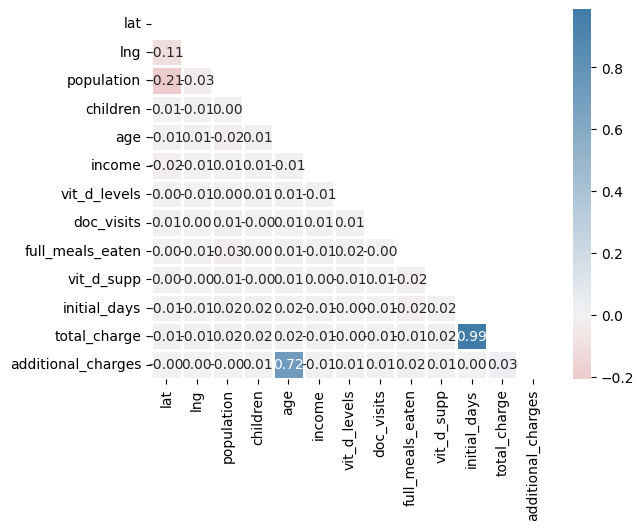

In [54]:
corr = df_init[quantitative_columns].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(h_neg=10,h_pos=240, as_cmap=True)

sns.heatmap(corr, mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

## t-SNE

In [14]:
# create PCA dataframe
df_pca = df_init[quantitative_columns]

* src = https://campus.datacamp.com/courses/dimensionality-reduction-in-python/exploring-high-dimensional-data?ex=7

In [15]:
from sklearn.manifold import TSNE

# higher learning rate more adventurous, lower = more conservative (10-1000 is common)
m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_pca)

tsne_features[1:4,:]




array([[ 16.899519 ,   2.8477242],
       [-24.702538 ,  31.980644 ],
       [  7.3716545, -28.360888 ]], dtype=float32)

In [16]:
df_init['x'] = tsne_features[:,0]
df_init['y'] = tsne_features[:,1]

<Axes: xlabel='x', ylabel='y'>

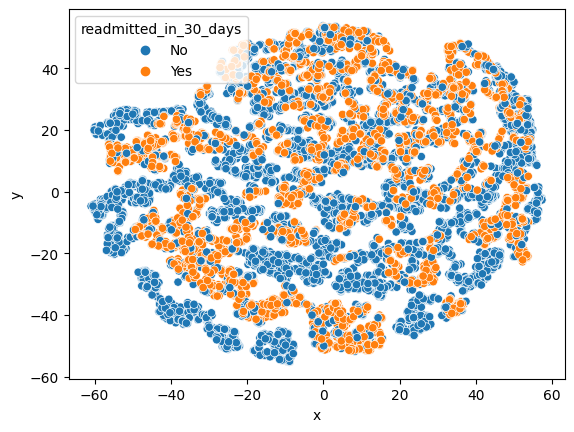

In [17]:
sns.scatterplot(x="x", y="y", hue='readmitted_in_30_days', data=df_init)

## Variance threshold

* https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-i-selecting-for-feature-information?ex=5

In [55]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)

variance_fitted_pca_df = sel.fit(df_pca / df_pca.mean())

mask = sel.get_support()

# TODO: use mask to select variables below threshold

## PCA analysis

In [53]:
# create normalized version of dataframe (Middleton 2021a)
df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

In [20]:
# perform PCA (Middleton 2021a)
pca = PCA(n_components=df_pca.shape[1])

pca.fit(df_pca_normalized)

df_pca = pd.DataFrame(pca.transform(df_pca_normalized))

In [21]:
# Create loadings (Middleton 2021a)
loadings = pd.DataFrame(pca.components_.T, index=df_pca_normalized.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,10,11,12
lat,-0.018834,0.000913,-0.715570,-0.036559,0.128188,-0.018260,-0.039974,-0.005117,-0.067661,-0.039423,0.679459,0.008903,0.001359
lng,-0.011011,0.009716,0.274895,-0.474659,-0.554592,-0.289613,0.229759,0.320779,0.056053,0.033702,0.384029,-0.004863,-0.000429
population,0.028719,-0.029027,0.626046,0.295638,0.250669,0.142253,-0.174676,-0.135732,-0.083567,0.038751,0.615001,0.016751,-0.000658
children,0.034537,0.017244,-0.034510,0.344621,0.158969,0.231131,0.427505,0.717166,-0.131085,0.292473,-0.006222,0.003440,-0.000938
age,0.084650,0.700793,0.011244,-0.020860,0.010691,0.011755,0.006632,-0.017856,-0.013308,-0.020631,-0.001154,0.706577,0.026277
income,-0.019701,-0.019176,0.075776,-0.067301,0.412381,-0.149024,0.651545,-0.162893,0.461862,-0.359436,0.056064,0.002441,0.001318
vit_d_levels,-0.001995,0.020340,-0.020176,0.526197,-0.213021,-0.366372,-0.208667,0.305325,0.061710,-0.634109,-0.003265,-0.002389,-0.001497
doc_visits,-0.006991,0.015446,0.017291,0.096735,0.282211,-0.820104,0.040698,-0.076493,-0.285582,0.381544,-0.056573,0.000868,-0.001114
full_meals_eaten,-0.020712,0.031960,-0.103248,0.454738,-0.385982,-0.050904,0.062235,-0.238447,0.590939,0.462602,0.073982,0.010748,-0.001632
vit_d_supp,0.025381,0.014511,0.029741,-0.262904,0.377611,-0.097049,-0.508283,0.424062,0.565530,0.137073,-0.018434,0.000367,-0.000604


In [22]:
# create covariance matrix (Middleton 2021a)
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized)/df_pca.shape[0]

In [23]:
# get eigen values (Middleton 2021a)
eigenvalues=[np.dot(eigenvector.T,np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

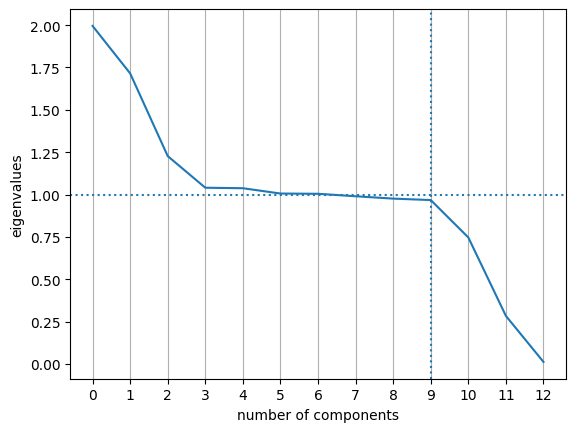

In [24]:
# load eigen values into a scree plot
# scree plot shows that keeping components 3
# will be most effective (Middleton 2021a)

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.xticks(range(0,13))
plt.grid(axis='x')
plt.axhline(y=1, linestyle = ":")
plt.axvline(x=9, linestyle= ":")
plt.show()